Exploratory Data Analysis

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [5]:
from google.colab import files
files.upload()



Saving train_u6lujuX_CVtuZ9i.csv to train_u6lujuX_CVtuZ9i.csv


{'train_u6lujuX_CVtuZ9i.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y\nLP001028,Male,Yes,2,Graduate,No,3073,8106,200,360,1,Urban,Y\nLP001029,Mal

In [6]:
df_train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

In [7]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df_train.shape

(614, 13)

In [9]:
del df_train['Loan_ID']
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
cat_cols = list(df_train.select_dtypes(include=['object']).columns)
num_cols = list(df_train.select_dtypes(exclude=['object']).columns)
print('Numeric columns:',num_cols)
print('Categorical columns:',cat_cols)

Numeric columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Missing Values Treatment

Analyze missing values

In [12]:
df_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801


In [14]:
df_train['Gender']           = df_train['Gender'].fillna(df_train['Gender'].dropna().mode().values[0] )
df_train['Married']          = df_train['Married'].fillna(df_train['Married'].dropna().mode().values[0] )
df_train['Dependents']       = df_train['Dependents'].fillna(df_train['Dependents'].dropna().mode().values[0] )
df_train['Self_Employed']    = df_train['Self_Employed'].fillna(df_train['Self_Employed'].dropna().mode().values[0] )
df_train['LoanAmount']       = df_train['LoanAmount'].fillna(df_train['LoanAmount'].dropna().mean())
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].dropna().mode().values[0] )
df_train['Credit_History']   = df_train['Credit_History'].fillna(df_train['Credit_History'].dropna().mode().values[0] )

In [15]:
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Data visualization

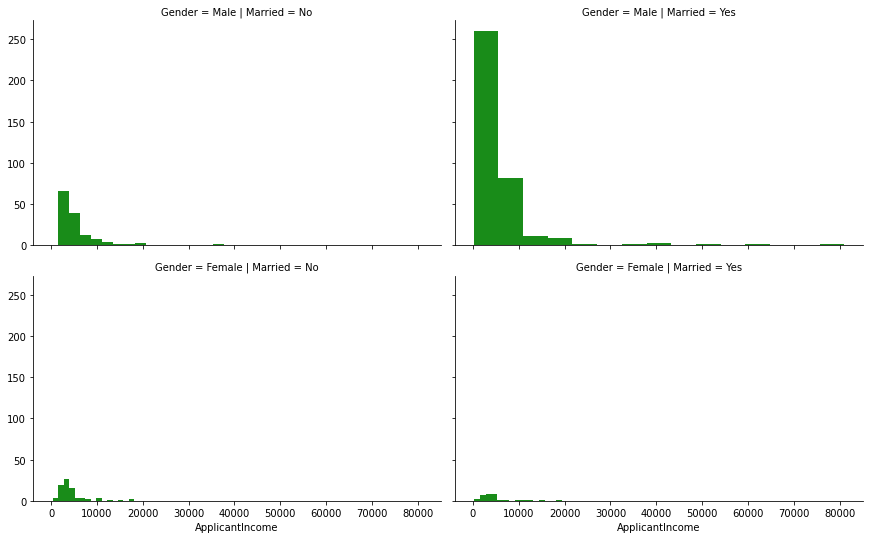

In [16]:
grid = sns.FacetGrid(df_train, row='Gender', col='Married', size=3.8, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=15,color='green')
grid.add_legend()

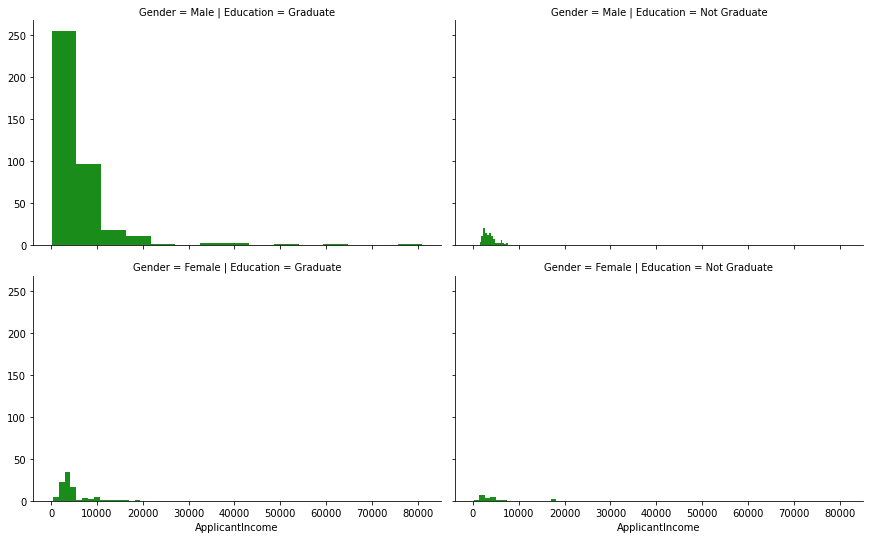

In [17]:
grid = sns.FacetGrid(df_train, row='Gender', col='Education', size=3.8, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=15,color='green')
grid.add_legend()

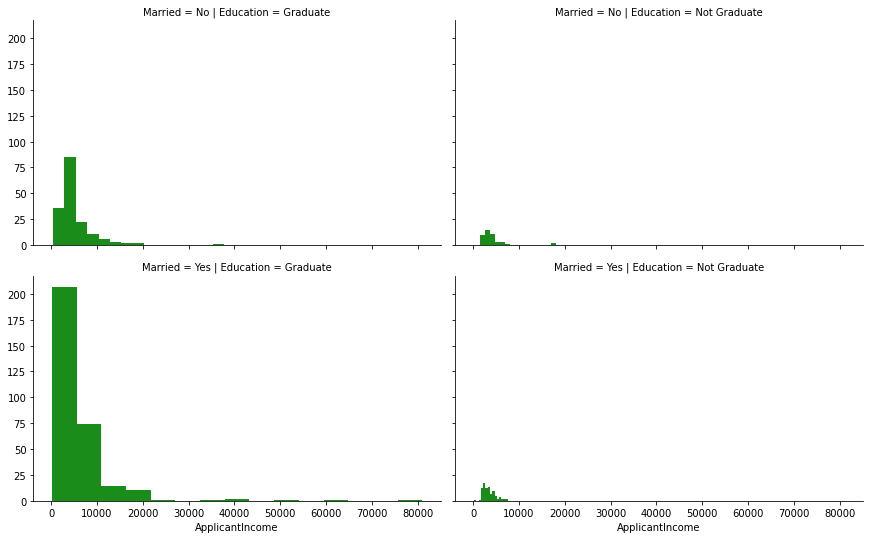

In [18]:
grid = sns.FacetGrid(df_train, row='Married', col='Education', size=3.8, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=15,color='green')
grid.add_legend()

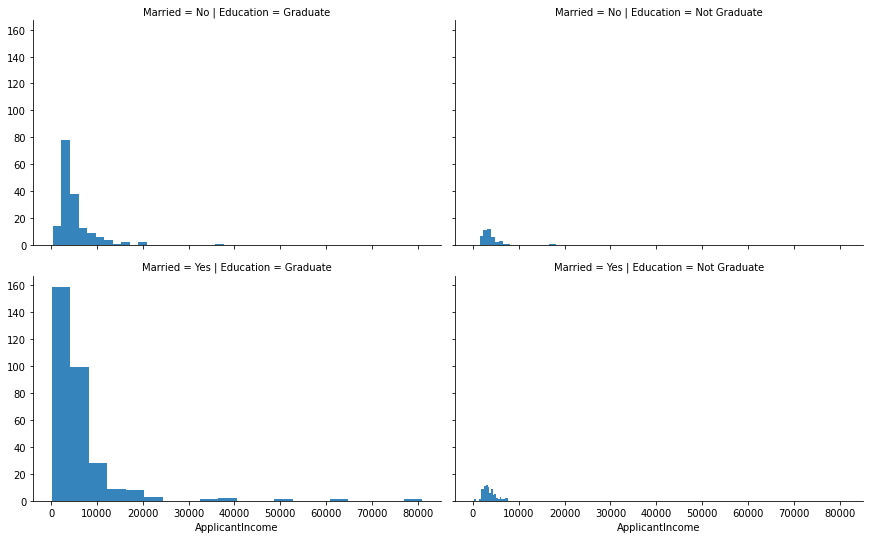

In [19]:
grid = sns.FacetGrid(df_train, row='Married', col='Education', size=3.8, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=20)
grid.add_legend()

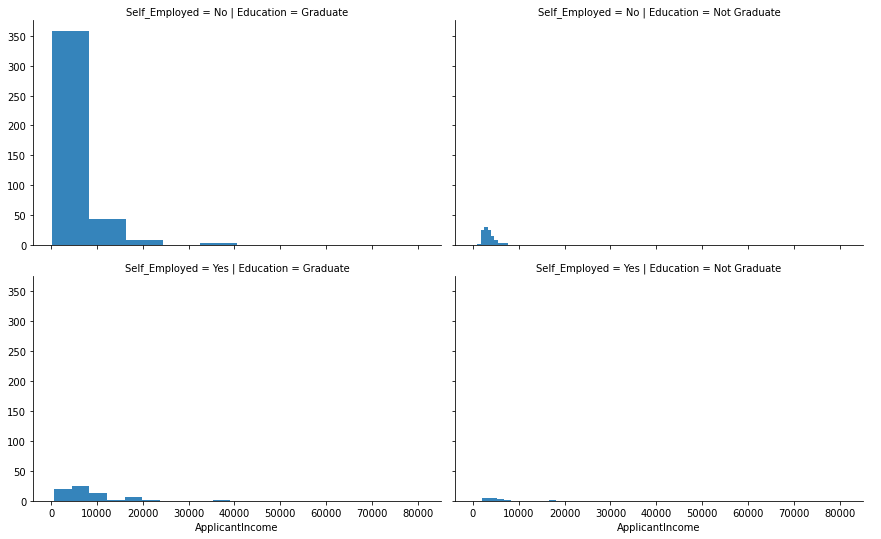

In [20]:
grid = sns.FacetGrid(df_train, row='Self_Employed', col='Education', size=3.8, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=10)
grid.add_legend()

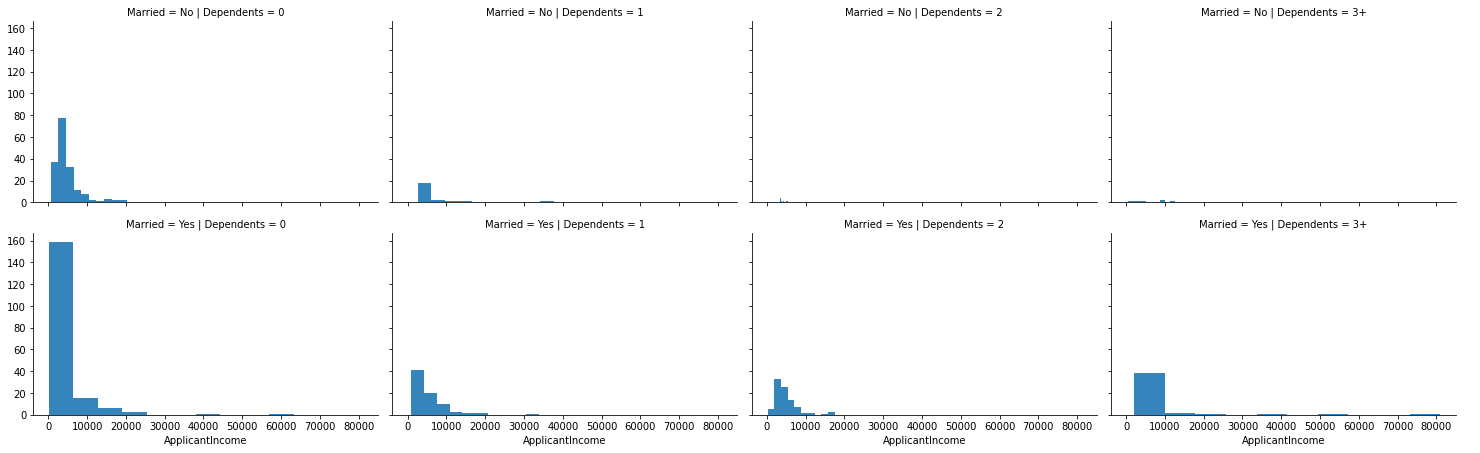

In [21]:
grid = sns.FacetGrid(df_train, row='Married', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=10)
grid.add_legend()

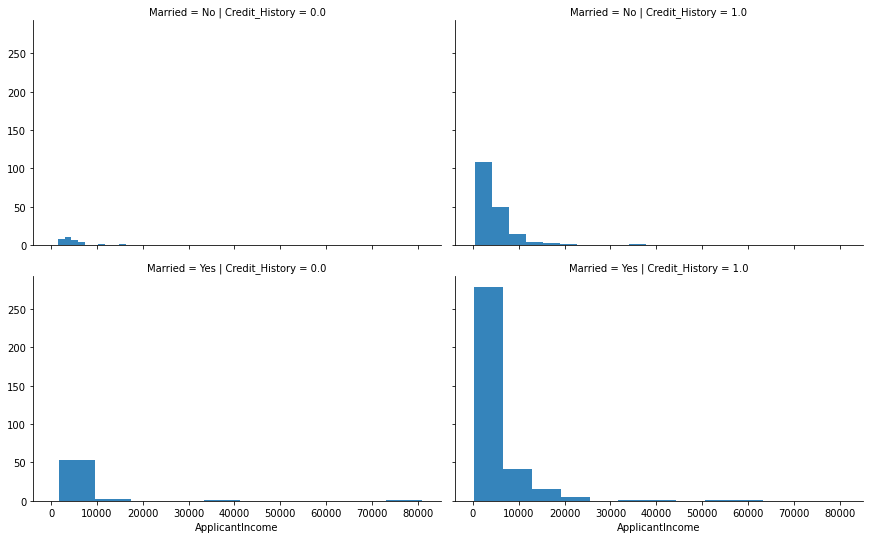

In [22]:
grid = sns.FacetGrid(df_train, row='Married', col='Credit_History', size=3.8, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=10)
grid.add_legend()

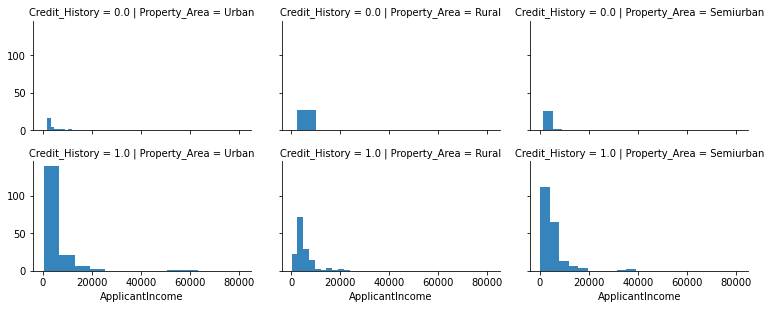

In [23]:
grid = sns.FacetGrid(df_train, row='Credit_History', col='Property_Area', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=10)
grid.add_legend()

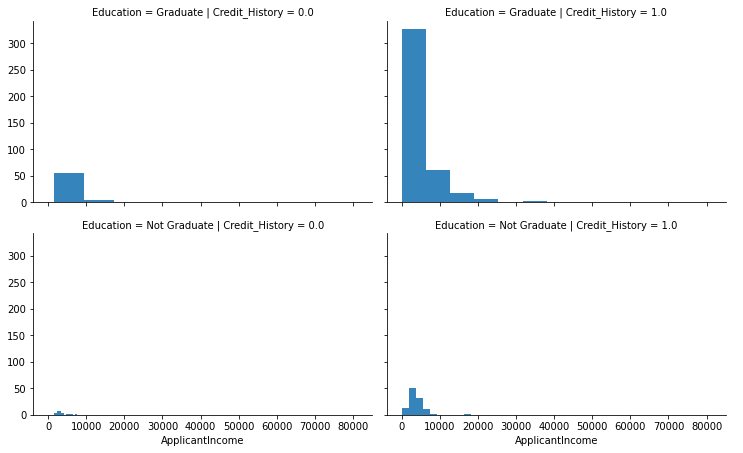

In [24]:
grid = sns.FacetGrid(df_train, row='Education', col='Credit_History', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.9, bins=10)
grid.add_legend()

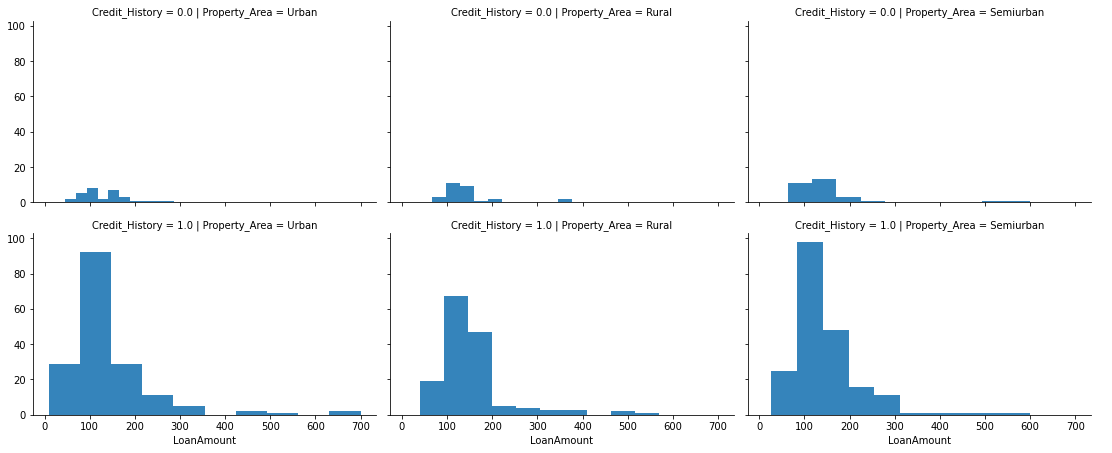

In [25]:
grid = sns.FacetGrid(df_train, row='Credit_History', col='Property_Area', size=3.2, aspect=1.6)
grid.map(plt.hist, 'LoanAmount', alpha=.9, bins=10)
grid.add_legend()

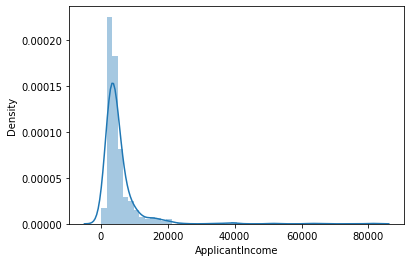

In [26]:
plot = sns.distplot(df_train['ApplicantIncome'],
                    hist=True)

Finding Outliers

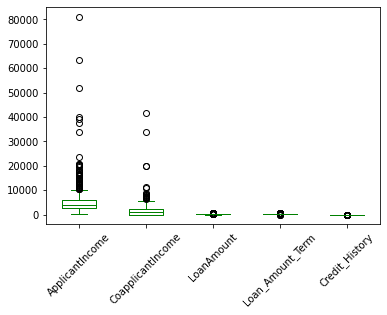

In [27]:
df_train.plot(kind='box',color='green',grid=False, rot=45)
plt.show()

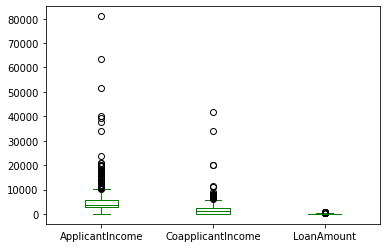

In [28]:
df_train.boxplot(column=['ApplicantIncome', 'CoapplicantIncome','LoanAmount'],color='green',grid=False)
plt.show()

Heatmap

Showing the correlations of features with the target. No correlations are extremely high.The correlations between LoanAmount and ApplicantIncome can be explained.

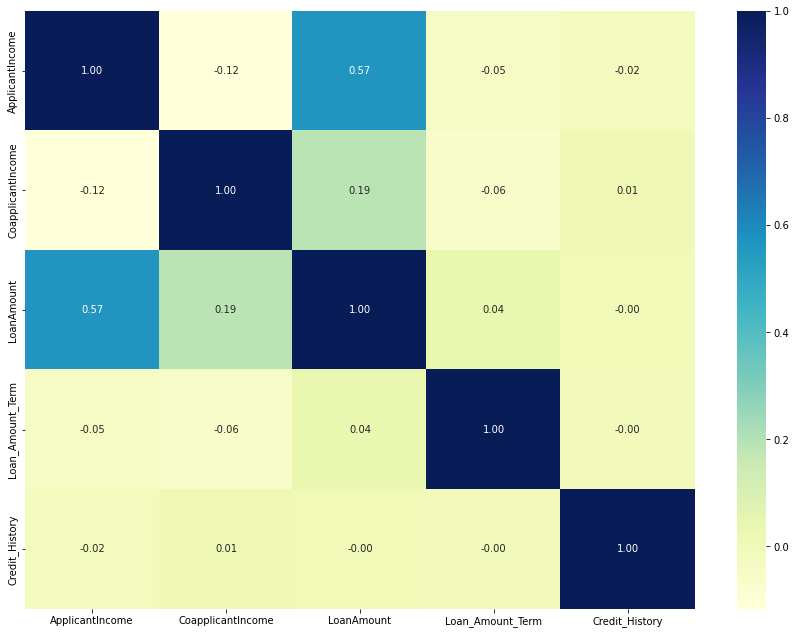

In [29]:
corr = df_train[num_cols].corr()
fig, ax = plt.subplots(figsize=(15,11))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".2f",cmap="YlGnBu");

Categorical Data Handling of train dataset

Lebel Encoding

In [30]:
for col in cat_cols:
    df_train[col] = df_train[col].astype('category')
    print(col,'---->', dict(enumerate(df_train[col].cat.categories)))
    df_train[col] = df_train[col].cat.codes

Gender ----> {0: 'Female', 1: 'Male'}
Married ----> {0: 'No', 1: 'Yes'}
Dependents ----> {0: '0', 1: '1', 2: '2', 3: '3+'}
Education ----> {0: 'Graduate', 1: 'Not Graduate'}
Self_Employed ----> {0: 'No', 1: 'Yes'}
Property_Area ----> {0: 'Rural', 1: 'Semiurban', 2: 'Urban'}
Loan_Status ----> {0: 'N', 1: 'Y'}


In [31]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


Now work on test dataset

In [33]:
from google.colab import files
files.upload()

Saving test_Y3wMUE5_7gLdaTN.csv to test_Y3wMUE5_7gLdaTN.csv


{'test_Y3wMUE5_7gLdaTN.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area\r\nLP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban\r\nLP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban\r\nLP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban\r\nLP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,,Urban\r\nLP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban\r\nLP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152,360,1,Urban\r\nLP001055,Female,No,1,Not Graduate,No,2226,0,59,360,1,Semiurban\r\nLP001056,Male,Yes,2,Not Graduate,No,3881,0,147,360,0,Rural\r\nLP001059,Male,Yes,2,Graduate,,13633,0,280,240,1,Urban\r\nLP001067,Male,No,0,Not Graduate,No,2400,2400,123,360,1,Semiurban\r\nLP001078,Male,No,0,Not Graduate,No,3091,0,90,360,1,Urban\r\nLP001082,Male,Yes,1,Graduate,,2185,1516,162,360,1,Semiurban\r\nLP001083,Male,No,3+,Graduate,No,4166,0,40,180,,Urban\r\nLP001094,Male,Yes,2

In [34]:
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [35]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


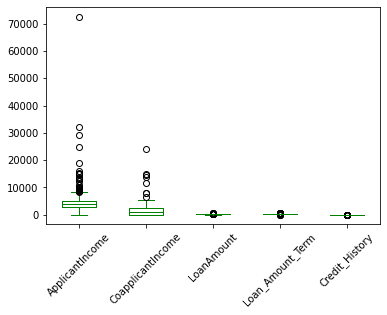

In [36]:
test.plot(kind='box',color='green',grid=False, rot=45)
plt.show()

In [37]:
del test['Loan_ID']
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [38]:
test.shape

(367, 11)

label encding for test dataset

In [39]:
cat_cols = list(test.select_dtypes(include=['object']).columns)
num_cols = list(test.select_dtypes(exclude=['object']).columns)
print('Numeric columns:',num_cols)
print('Categorical columns:',cat_cols)

Numeric columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [40]:
for col in cat_cols:
    test[col] = test[col].astype('category')
    print(col,'---->', dict(enumerate(test[col].cat.categories)))
    test[col] = test[col].cat.codes

Gender ----> {0: 'Female', 1: 'Male'}
Married ----> {0: 'No', 1: 'Yes'}
Dependents ----> {0: '0', 1: '1', 2: '2', 3: '3+'}
Education ----> {0: 'Graduate', 1: 'Not Graduate'}
Self_Employed ----> {0: 'No', 1: 'Yes'}
Property_Area ----> {0: 'Rural', 1: 'Semiurban', 2: 'Urban'}


In [41]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,NaN,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993,126.0,360.0,NaN,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


Machine Learning Model Train

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [43]:
y = df_train['Loan_Status']
X = df_train.drop('Loan_Status', axis = 1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Logistic Regression

In [45]:
model = LogisticRegression()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation

0.8979591836734695

DecisionTree

In [46]:
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)
ypred_tree = tree.predict(X_test)
evaluation = f1_score(y_test, ypred_tree)
evaluation

0.788235294117647

Random forest

In [47]:
forest=RandomForestClassifier()
forest.fit(X_train, y_train)
ypred_forest = forest.predict(X_test)
evaluation_forest = f1_score(y_test, ypred_forest)
evaluation_forest

0.869109947643979